Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_age,med_age,sd_hours
<dbl>,<dbl>,<dbl>
20.25397,19,5.083078


mean_hours,med_hours,sd_hours
<dbl>,<dbl>,<dbl>
6.01746,0.1,21.98721


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”
Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 2 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,26.12369,5,9.470785,Preprocessor1_Model01
2,rmse,standard,23.96365,5,7.969523,Preprocessor1_Model02
3,rmse,standard,21.95728,5,7.327325,Preprocessor1_Model03
4,rmse,standard,20.33274,5,7.644228,Preprocessor1_Model04
5,rmse,standard,19.42321,5,7.858820,Preprocessor1_Model05
6,rmse,standard,18.84286,5,8.017513,Preprocessor1_Model06
7,rmse,standard,18.61693,5,8.050866,Preprocessor1_Model07
8,rmse,standard,18.36691,5,8.132512,Preprocessor1_Model08
9,rmse,standard,18.20228,5,8.177003,Preprocessor1_Model09


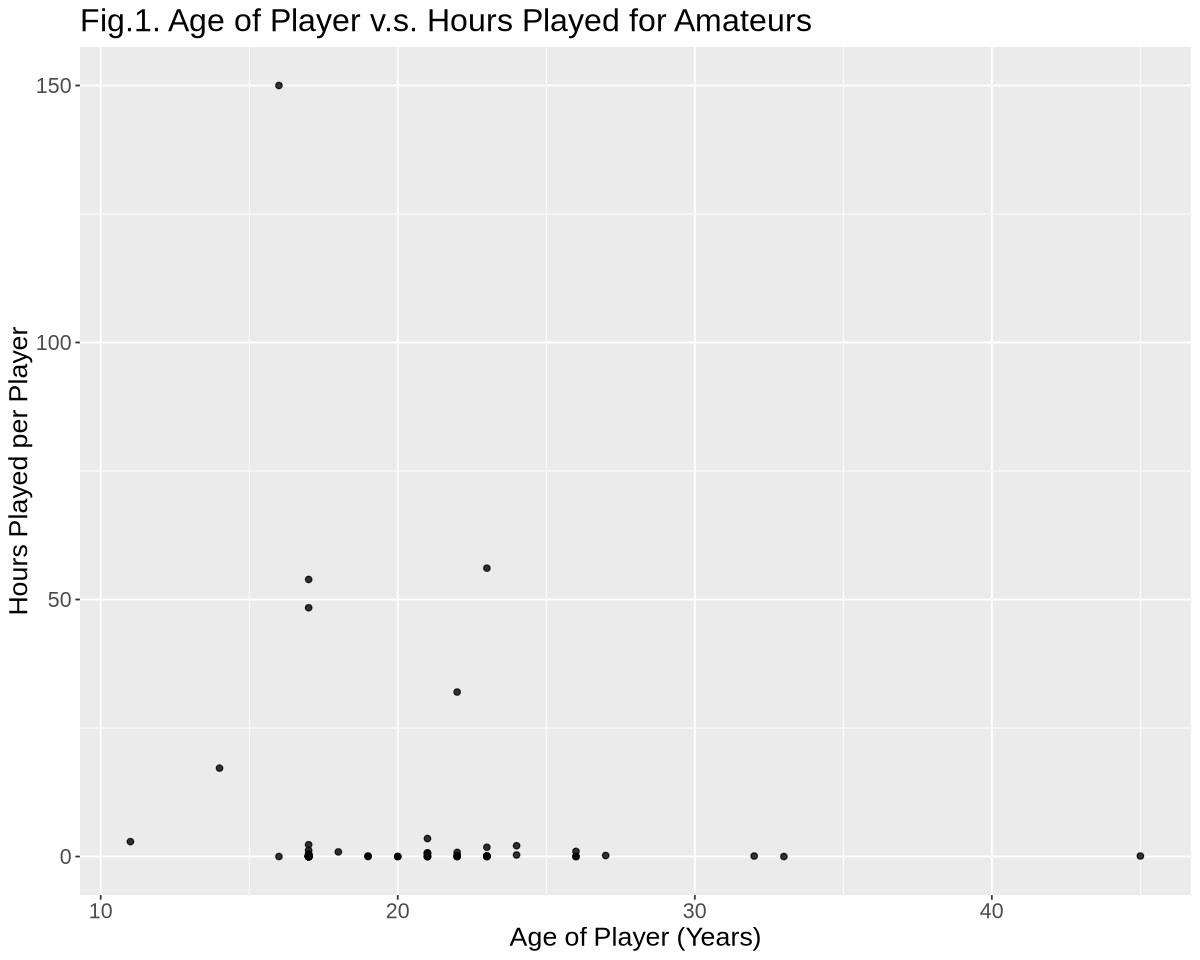

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.3941


.pred,Age
<dbl>,<dbl>
13.13076923,11
13.13076923,12
13.13076923,13
12.90769231,14
12.90769231,15
11.58461538,16
0.04615385,17
0.12307692,18
0.10769231,19


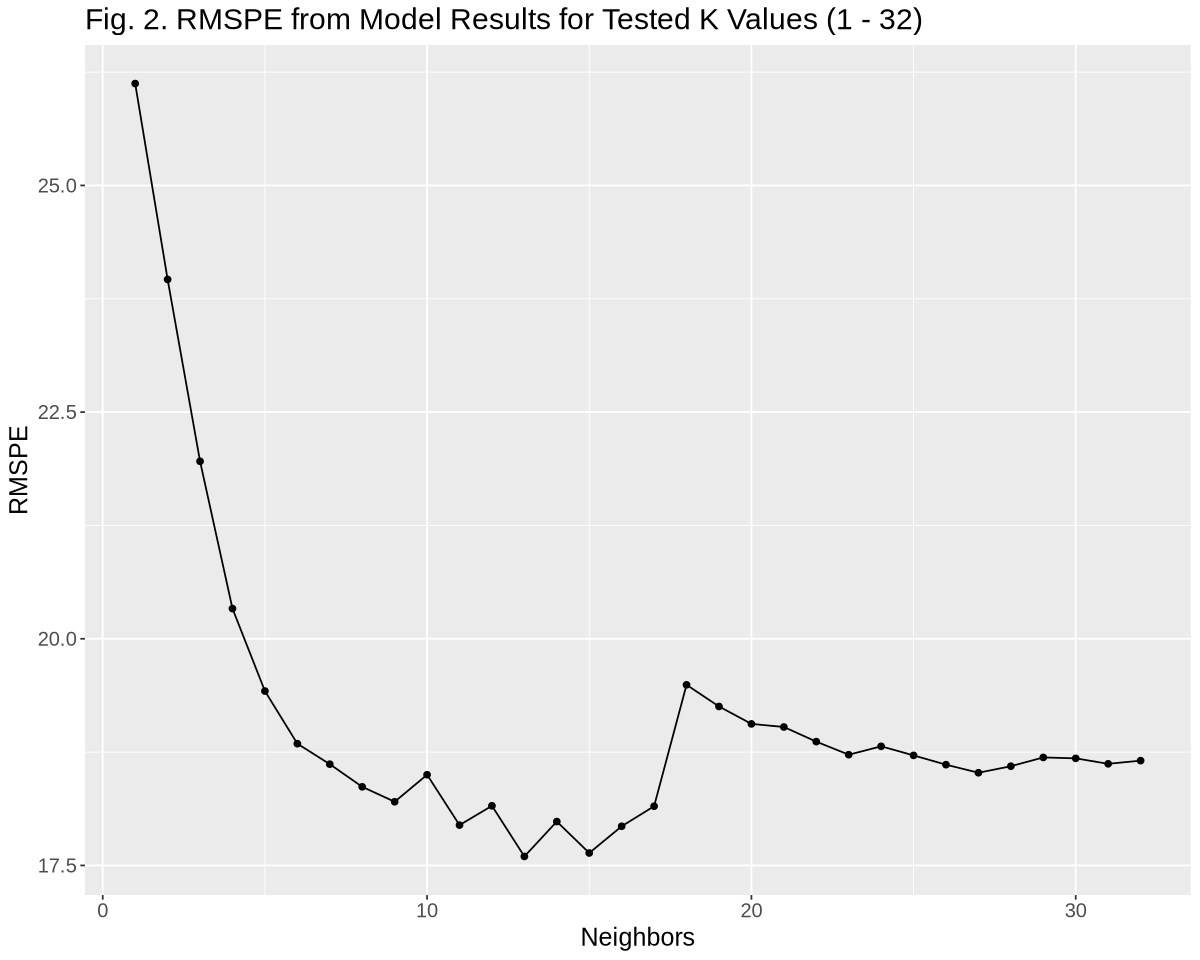

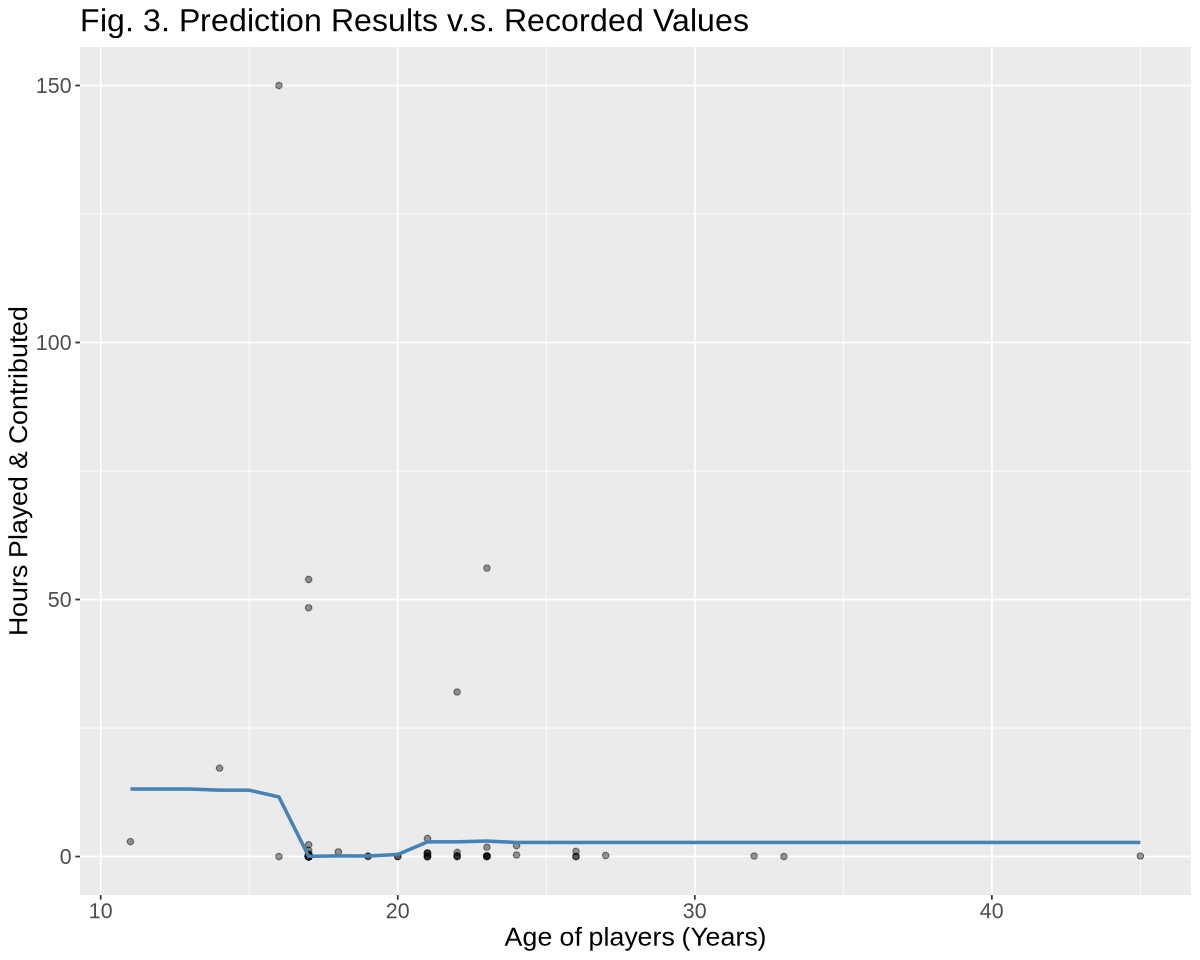

In [4]:
set.seed(1)

library(tidyverse)
library(tidymodels)

# loading player data into players df
players <- read_csv("data/players.csv")

# Filtering data for amateur players, ommiting missing data
filtered_players <- players |>
filter(experience == "Amateur") |>
na.omit()

filtered_players <- players |>
filter(experience == "Amateur") |>
na.omit()

filtered_plot <- filtered_players |>
ggplot(aes(x = Age, y = played_hours)) +
geom_point(alpha = 0.8) +
labs(x = "Age of Player (Years)", y = "Hours Played per Player") + 
theme(text = element_text(size = 16)) +
ggtitle("Fig.1. Age of Player v.s. Hours Played for Amateurs")
filtered_plot


# filtered_players
summary_hours <- filtered_players |>
summarize(

    mean_hours = mean(played_hours),
    med_hours = median(played_hours),
    sd_hours = sd(played_hours)   
)

summary_age <- filtered_players |>
summarize(
    mean_age = mean(Age),
    med_age =  median(Age),
    sd_hours = sd(Age)
)

summary_age
summary_hours
# setting seed for project
set.seed(1)

# creating split & training/testing sets
player_split <- initial_split(filtered_players, strata = played_hours, prop = 0.75)
player_training <- training(player_split)
player_testing <- testing(player_split)


# creating workflow 

# recipe
knn_recipe <- recipe(played_hours ~ Age, data = player_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", mode = "regression", engine = "kknn", neighbors = tune()) 

player_vfold <- vfold_cv(player_training, v = 5, strata = played_hours)

grid_vals <- tibble(neighbors = seq(1, 32, 1))

player_workflow <- workflow() |>
add_recipe(knn_recipe) |>
add_model(knn_spec)

player_results <- player_workflow |>
tune_grid(resamples = player_vfold, grid = grid_vals) |>
collect_metrics() |>
filter(.metric == "rmse")

player_results

# plot showing mean rmspe vs K value
result_plot <- player_results |>
ggplot(aes(x = neighbors, y = mean)) + 
geom_line() +
geom_point() + 
labs(x = "Neighbors", y = "RMSPE") + 
theme(text = element_text(size = 15)) + 
ggtitle("Fig. 2. RMSPE from Model Results for Tested K Values (1 - 32)") 

result_plot

best_k <- player_results |>
filter(mean == min(mean)) |>
select(neighbors) |>
pull()

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k, engine = "kknn", mode = "regression")

player_fit <- workflow() |>
add_model(player_spec) |>
add_recipe(knn_recipe) |>
fit(data = player_training)

player_summary <- player_fit |>
predict(player_testing) |>
bind_cols(player_testing) |>
metrics(truth = played_hours, estimate = .pred) |>
filter(.metric == 'rmse')

player_summary

pred_grid <- tibble(

    Age =  seq(

        from = filtered_players |> select(Age) |> min(),
        to = filtered_players |> select(Age) |> max(),
        by = 1
        
    )
)

player_preds <- player_fit |>
predict(pred_grid) |>
bind_cols(pred_grid)

player_preds

player_plot <- ggplot(filtered_players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = player_preds,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Age of players (Years)") +
  ylab("Hours Played & Contributed") +
  theme(text = element_text(size = 16)) +
  ggtitle("Fig. 3. Prediction Results v.s. Recorded Values")

player_plot